# **Sujet 7 :  Etude des caract√©ristiques du noyau cellulaire pour le diagnostic du cancer du sein**
# Participant:

*   **Berlyse Dafna SOFACK KENFACK**
*   **Badiane Maimouna NDEYE**
*   ***Clara VAN CAUTER ***



 Le cancer du sein constitue l'une des principales causes de mortalit√© chez les femmes √† travers le monde. Son diagnostic pr√©coce joue un r√¥le crucial dans l‚Äôam√©lioration du pronostic et la survie des patientes. Dans cette optique, l‚Äôanalyse des caract√©ristiques morphologiques des noyaux
 cellulaires, obtenues a partir de biopsie a l‚Äôaiguille fine (BAF) de masses mammaires, repr√©sente
 une m√©thode prometteuse pour affiner les techniques de diagnostic assist√© par ordinateur. L‚Äôobjectif de cette √©tude est donc de mieux comprendre les attributs morphologiques associ√©s aux
 tumeurs b√©nignes et malignes, et d‚Äô√©valuer leur pertinence pour le diagnostic automatis√© du cancer
 du sein: Comprendre les diff√©rences des caract√©ristiques entre tumeurs b√©nignes et malignes.

√âvaluer la pertinence de ces caract√©ristiques pour un diagnostic assist√© par ordinateur.



Librairies utilis√©es

In [ ]:
import numpy as np
import pandas as pd #pour l'analyse des donn√©es
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler , MinMaxScaler , RobustScaler
from sklearn import preprocessing
import warnings


Analyse de donn√©es :
# 1. Compr√©hension et organisation de nos donn√©es

In [ ]:
fichier_data = 'wdbc.data'
fichier_name= 'wdbc.names'

df = pd.read_csv(fichier_data)
print(df.head(10))




     842302  M  17.99  10.38   122.8    1001   0.1184   0.2776   0.3001  \
0    842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690   
1  84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740   
2  84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140   
3  84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800   
4    843786  M  12.45  15.70   82.57   477.1  0.12780  0.17000  0.15780   
5    844359  M  18.25  19.98  119.60  1040.0  0.09463  0.10900  0.11270   
6  84458202  M  13.71  20.83   90.20   577.9  0.11890  0.16450  0.09366   
7    844981  M  13.00  21.82   87.50   519.8  0.12730  0.19320  0.18590   
8  84501001  M  12.46  24.04   83.97   475.9  0.11860  0.23960  0.22730   
9    845636  M  16.02  23.24  102.70   797.8  0.08206  0.06669  0.03299   

    0.1471  ...  25.38  17.33   184.6    2019  0.1622  0.6656  0.7119  \
0  0.07017  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416   
1  0.12790  ...  23.57  25.5

In [ ]:

#on attribue √† chaque colonne sa signification d'apr√®s les donn√©es afin de faciliter l'analyse
columns = [
    'id','Diagnosis','radius1','texture1','perimeter1','area1','smoothness1','compactness1','concavity1','concave_points1',
    'symmetry1','fractal_dimension1','radius2','texture2','perimeter2','area2','smoothness2','compactness2','concavity2','concave_points2',
    'symmetry2','fractal_dimension2','radius3','texture3','perimeter3','area3','smoothness3','compactness3','concavity3','concave_points3',
    'symmetry3','fractal_dimension3',
]
# Lecture du fichier avec les noms de chaque donn√©es des colonnes
df = pd.read_csv("wdbc.data", header=None, names=columns)

# Afficher les 10 premi√®res lignes
print(df.head(10))

         id Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  \
0    842302         M    17.99     10.38      122.80  1001.0      0.11840   
1    842517         M    20.57     17.77      132.90  1326.0      0.08474   
2  84300903         M    19.69     21.25      130.00  1203.0      0.10960   
3  84348301         M    11.42     20.38       77.58   386.1      0.14250   
4  84358402         M    20.29     14.34      135.10  1297.0      0.10030   
5    843786         M    12.45     15.70       82.57   477.1      0.12780   
6    844359         M    18.25     19.98      119.60  1040.0      0.09463   
7  84458202         M    13.71     20.83       90.20   577.9      0.11890   
8    844981         M    13.00     21.82       87.50   519.8      0.12730   
9  84501001         M    12.46     24.04       83.97   475.9      0.11860   

   compactness1  concavity1  concave_points1  ...  radius3  texture3  \
0       0.27760     0.30010          0.14710  ...    25.38     17.33   
1       

In [ ]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  569 non-null    int64  
 1   Diagnosis           569 non-null    object 
 2   radius1             569 non-null    float64
 3   texture1            569 non-null    float64
 4   perimeter1          569 non-null    float64
 5   area1               569 non-null    float64
 6   smoothness1         569 non-null    float64
 7   compactness1        569 non-null    float64
 8   concavity1          569 non-null    float64
 9   concave_points1     569 non-null    float64
 10  symmetry1           569 non-null    float64
 11  fractal_dimension1  569 non-null    float64
 12  radius2             569 non-null    float64
 13  texture2            569 non-null    float64
 14  perimeter2          569 non-null    float64
 15  area2               569 non-null    float64
 16  smoothne

In [ ]:
df.describe()

id     radius1    texture1  perimeter1        area1  \
count  5.690000e+02  569.000000  569.000000  569.000000   569.000000   
mean   3.037183e+07   14.127292   19.289649   91.969033   654.889104   
std    1.250206e+08    3.524049    4.301036   24.298981   351.914129   
min    8.670000e+03    6.981000    9.710000   43.790000   143.500000   
25%    8.692180e+05   11.700000   16.170000   75.170000   420.300000   
50%    9.060240e+05   13.370000   18.840000   86.240000   551.100000   
75%    8.813129e+06   15.780000   21.800000  104.100000   782.700000   
max    9.113205e+08   28.110000   39.280000  188.500000  2501.000000   

       smoothness1  compactness1  concavity1  concave_points1   symmetry1  \
count   569.000000    569.000000  569.000000       569.000000  569.000000   
mean      0.096360      0.104341    0.088799         0.048919    0.181162   
std       0.014064      0.052813    0.079720         0.038803    0.027414   
min       0.052630      0.019380    0.000000         0.000000    0.106000   
25%       0.086370      0.064920    0.029560         0.020310    0.161900   
50%       0.095870      0.092630    0.061540         0.033500    0.179200   
75%       0.105300      0.130400    0.130700         0.074000    0.195700   
max       0.163400      0.345400    0.426800         0.201200    0.304000   

       ...     radius3    texture3  perimeter3        area3  smoothness3  \
count  ...  569.000000  569.000000  569.000000   569.000000   569.000000   
mean   ...   16.269190   25.677223  107.261213   880.583128     0.132369   
std    ...    4.833242    6.146258   33.602542   569.356993     0.022832   
min    ...    7.930000   12.020000   50.410000   185.200000     0.071170   
25%    ...   13.010000   21.080000   84.110000   515.300000     0.116600   
50%    ...   14.970000   25.410000   97.660000   686.500000     0.131300   
75%    ...   18.790000   29.720000  125.400000  1084.000000     0.146000   
max    ...   36.040000   49.540000  251.200000  4254.000000     0.222600   

       compactness3  concavity3  concave_points3   symmetry3  \
count    569.000000  569.000000       569.000000  569.000000   
mean       0.254265    0.272188         0.114606    0.290076   
std        0.157336    0.208624         0.065732    0.061867   
min        0.027290    0.000000         0.000000    0.156500   
25%        0.147200    0.114500         0.064930    0.250400   
50%        0.211900    0.226700         0.099930    0.282200   
75%        0.339100    0.382900         0.161400    0.317900   
max        1.058000    1.252000         0.291000    0.663800   

       fractal_dimension3  
count          569.000000  
mean             0.083946  
std              0.018061  
min              0.055040  
25%              0.071460  
50%              0.080040  
75%              0.092080  
max              0.207500  

[8 rows x 31 columns]

2. Pr√©traitement des donn√©es
*   Suppression de la colonne id car elle represente l'identifiant unique du patient et ne nous sera pas utile pour l'analyse des donn√©es cancer
*   Encodage de diagnosis (B=0, M=1) : c'est la variable cible du probl√®me de classification :


*   Diagnosis = B	B√©nigne (non canc√©reux)
*   Diagnosis = M	Maligne (canc√©reux)

In [ ]:
#suppression des colonnes inutiles pour l'analyse comme id representant l'identifiant patient n'√©tant pas utile pour l'analyse de donn√©es
df.drop('id',axis=1,inplace=True)
df.Diagnosis=df.Diagnosis.map({'M':1, 'B':0})

#transforme la variable diagnosis : M (maligne) en  1 et B (benigne) en  0

df.head(10) #affiche les 10 premi√®res lignes du fichier nettoy√©

Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  \
0          1    17.99     10.38      122.80  1001.0      0.11840   
1          1    20.57     17.77      132.90  1326.0      0.08474   
2          1    19.69     21.25      130.00  1203.0      0.10960   
3          1    11.42     20.38       77.58   386.1      0.14250   
4          1    20.29     14.34      135.10  1297.0      0.10030   
5          1    12.45     15.70       82.57   477.1      0.12780   
6          1    18.25     19.98      119.60  1040.0      0.09463   
7          1    13.71     20.83       90.20   577.9      0.11890   
8          1    13.00     21.82       87.50   519.8      0.12730   
9          1    12.46     24.04       83.97   475.9      0.11860   

   compactness1  concavity1  concave_points1  symmetry1  ...  radius3  \
0       0.27760     0.30010          0.14710     0.2419  ...    25.38   
1       0.07864     0.08690          0.07017     0.1812  ...    24.99   
2       0.15990     0.19740          0.12790     0.2069  ...    23.57   
3       0.28390     0.24140          0.10520     0.2597  ...    14.91   
4       0.13280     0.19800          0.10430     0.1809  ...    22.54   
5       0.17000     0.15780          0.08089     0.2087  ...    15.47   
6       0.10900     0.11270          0.07400     0.1794  ...    22.88   
7       0.16450     0.09366          0.05985     0.2196  ...    17.06   
8       0.19320     0.18590          0.09353     0.2350  ...    15.49   
9       0.23960     0.22730          0.08543     0.2030  ...    15.09   

   texture3  perimeter3   area3  smoothness3  compactness3  concavity3  \
0     17.33      184.60  2019.0       0.1622        0.6656      0.7119   
1     23.41      158.80  1956.0       0.1238        0.1866      0.2416   
2     25.53      152.50  1709.0       0.1444        0.4245      0.4504   
3     26.50       98.87   567.7       0.2098        0.8663      0.6869   
4     16.67      152.20  1575.0       0.1374        0.2050      0.4000   
5     23.75      103.40   741.6       0.1791        0.5249      0.5355   
6     27.66      153.20  1606.0       0.1442        0.2576      0.3784   
7     28.14      110.60   897.0       0.1654        0.3682      0.2678   
8     30.73      106.20   739.3       0.1703        0.5401      0.5390   
9     40.68       97.65   711.4       0.1853        1.0580      1.1050   

   concave_points3  symmetry3  fractal_dimension3  
0           0.2654     0.4601             0.11890  
1           0.1860     0.2750             0.08902  
2           0.2430     0.3613             0.08758  
3           0.2575     0.6638             0.17300  
4           0.1625     0.2364             0.07678  
5           0.1741     0.3985             0.12440  
6           0.1932     0.3063             0.08368  
7           0.1556     0.3196             0.11510  
8           0.2060     0.4378             0.10720  
9           0.2210     0.4366             0.20750  

[10 rows x 31 columns]

# 2. Analyse exploratoire afin de Comprendre visuellement les donn√©es .

L'analyse exploratoire met en √©vidence une corr√©lation forte entre certaines variables, notamment les mesures de forme du noyau cellulaire (rayon, concavit√©, etc.).
La variable cible Diagnosis est li√©e positivement √† plusieurs de ces mesures, ce qui confirme leur pertinence pour le diagnostic automatique du cancer du sein.
Les visualisations (histogrammes, boxplots, matrice de corr√©lation) facilitent la compr√©hension structurelle du dataset et la pr√©paration de mod√®les fiables.
Pour la suite on verra:
-Statistiques descriptives (moyenne,
√©cart-type par classe)
-Visualisations :
lin plots pour comparer les distributions
-Heatmap de corr√©lation
-PCA / t-SNE pour visualiser la s√©parabilit√©
-Boxplots / vio

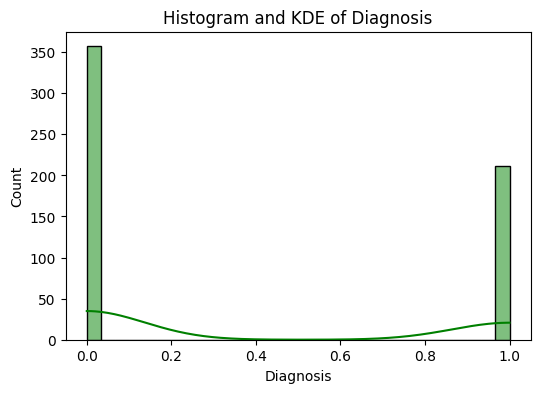

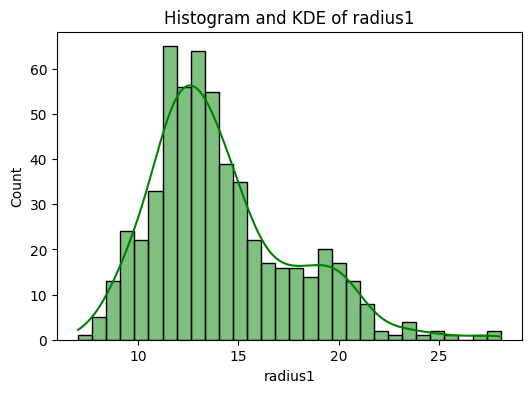

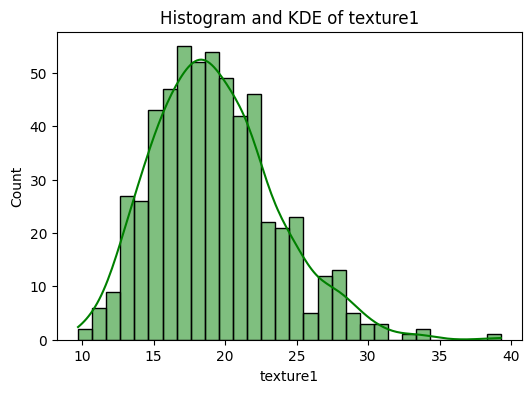

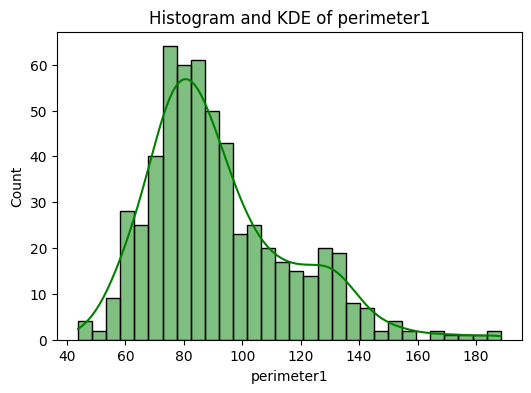

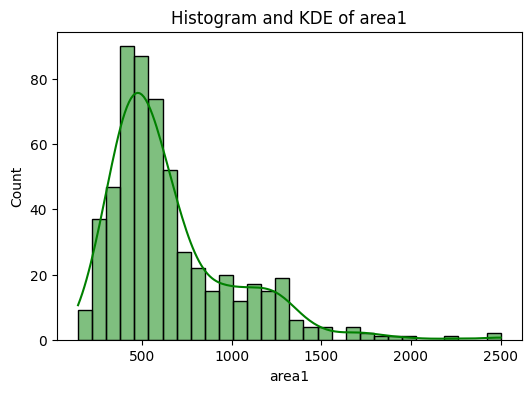

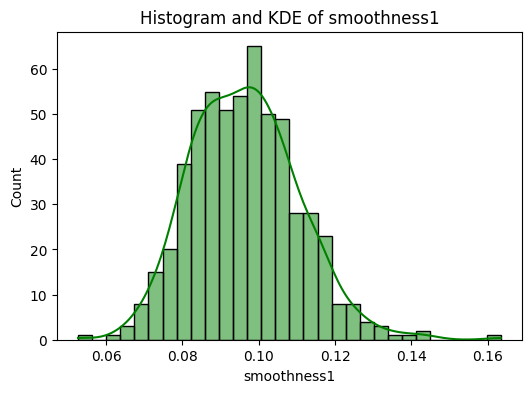

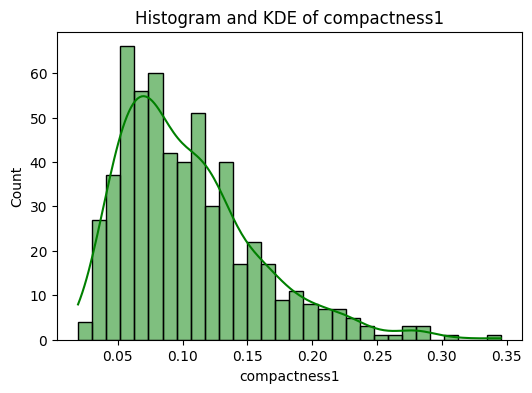

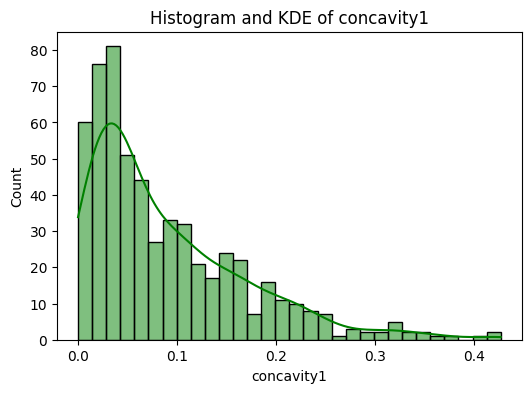

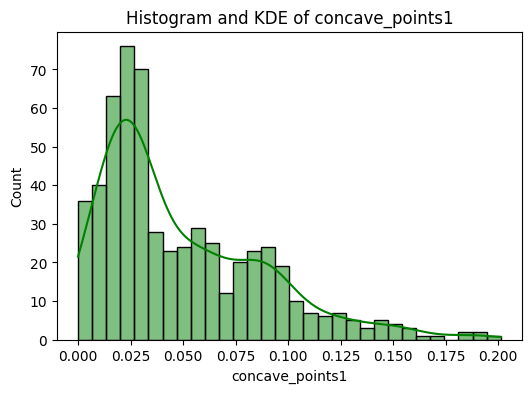

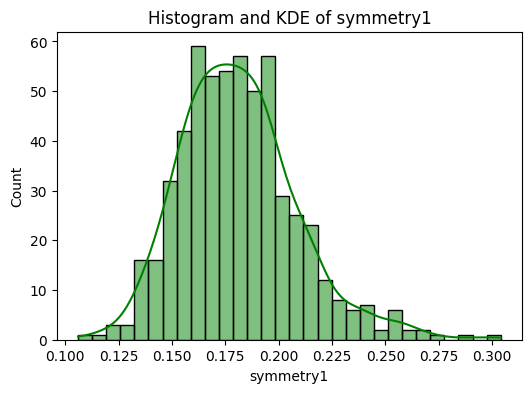

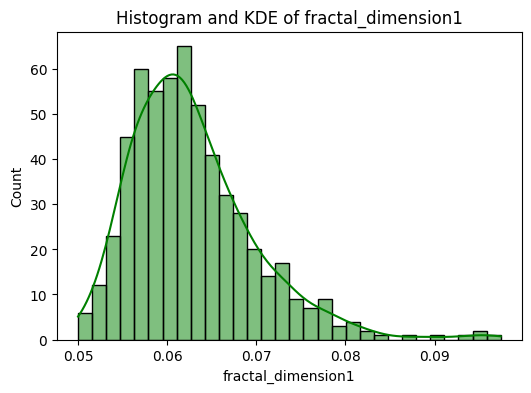

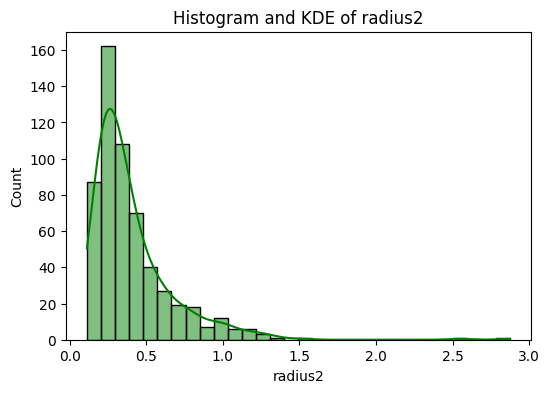

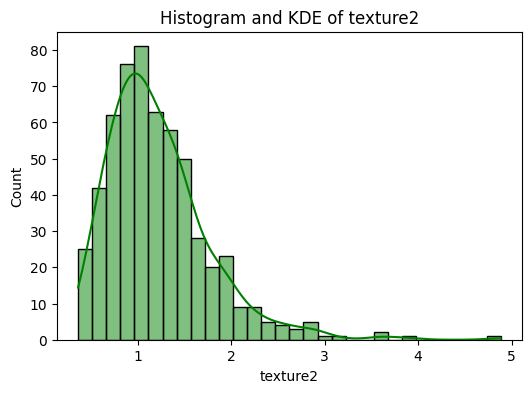

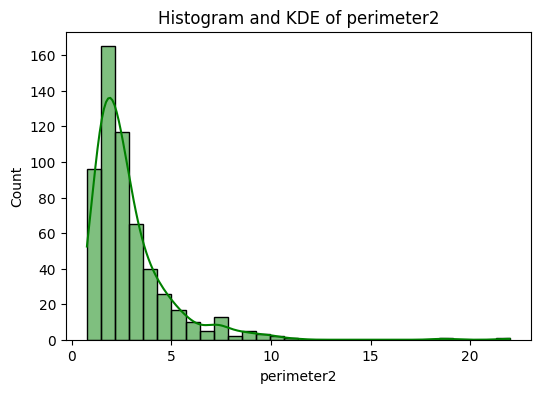

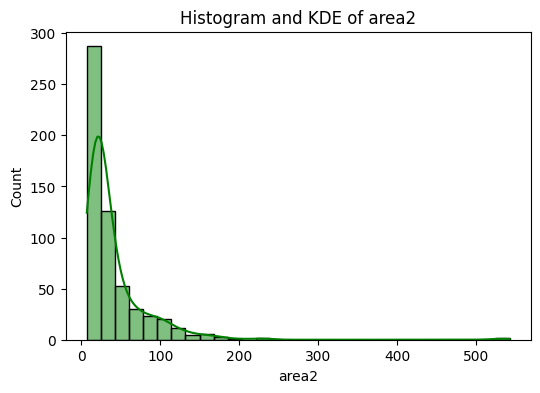

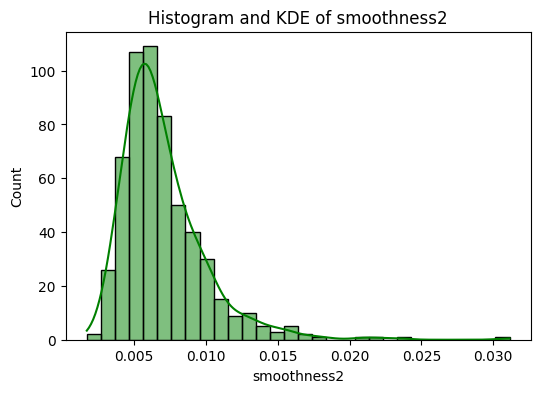

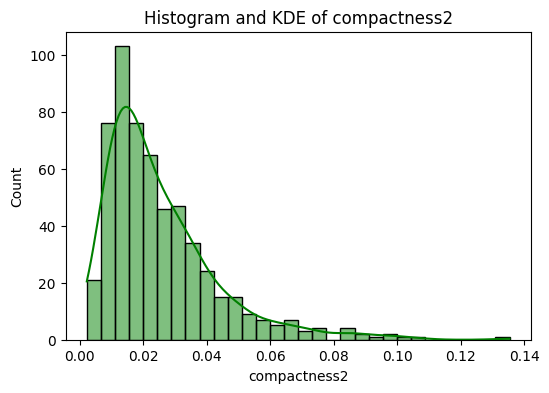

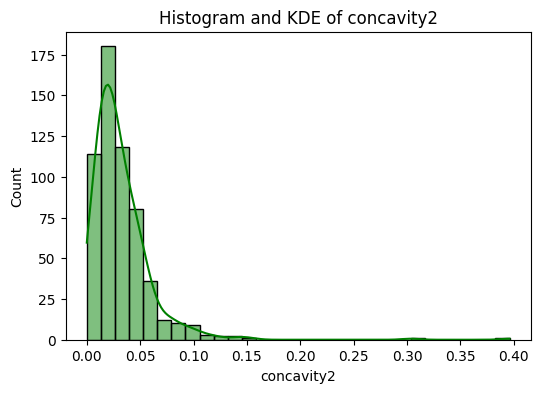

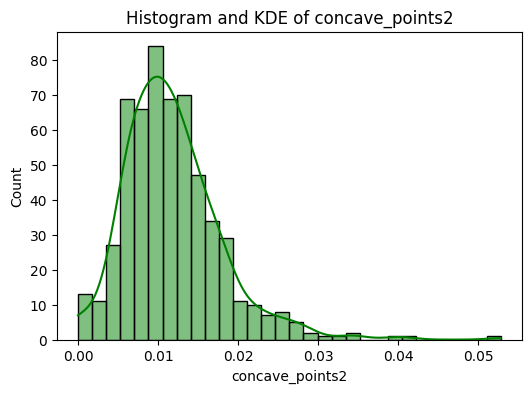

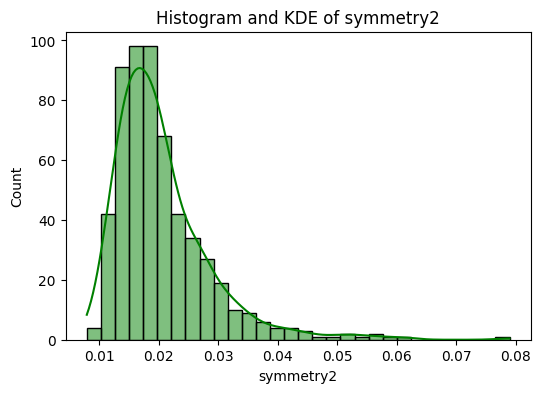

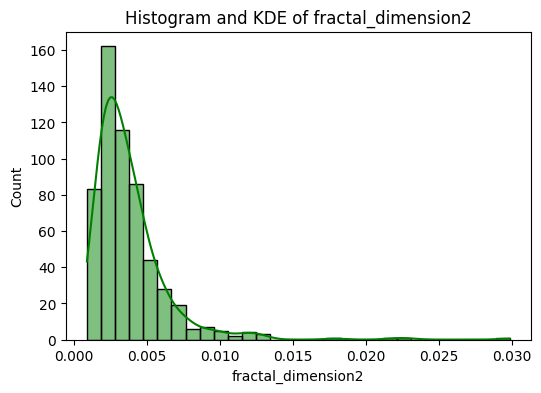

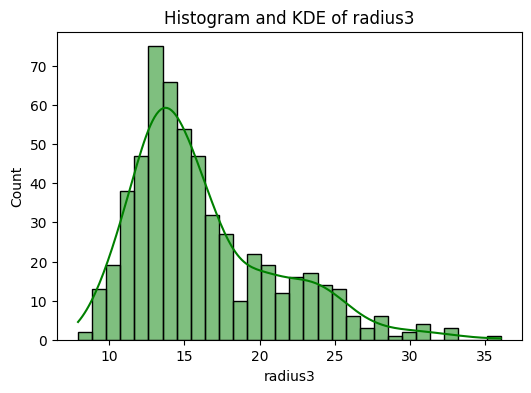

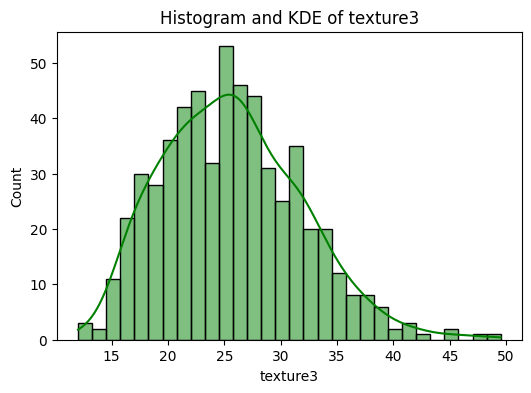

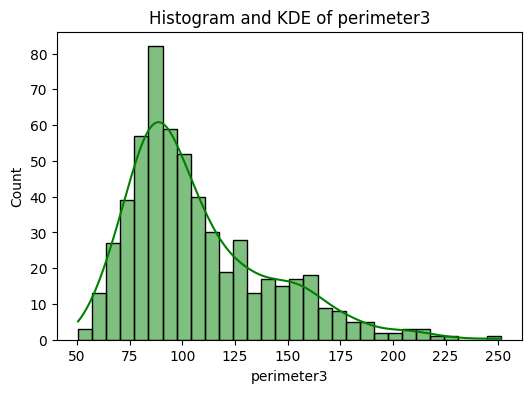

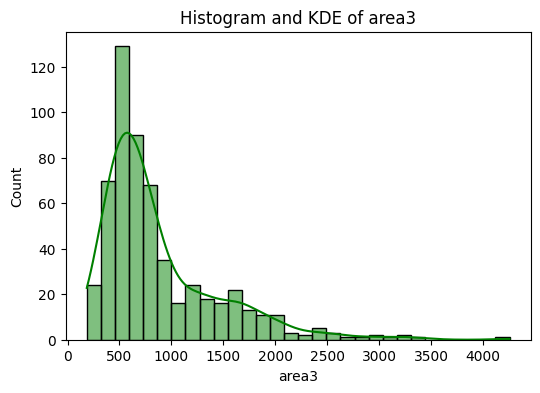

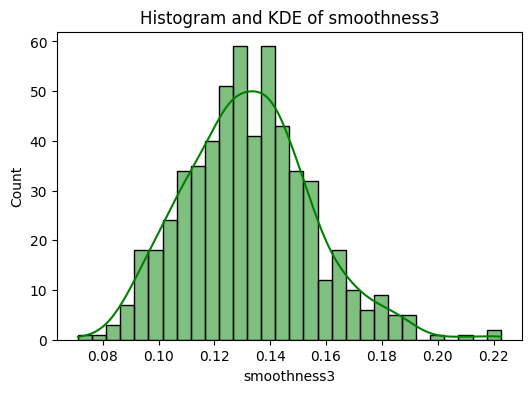

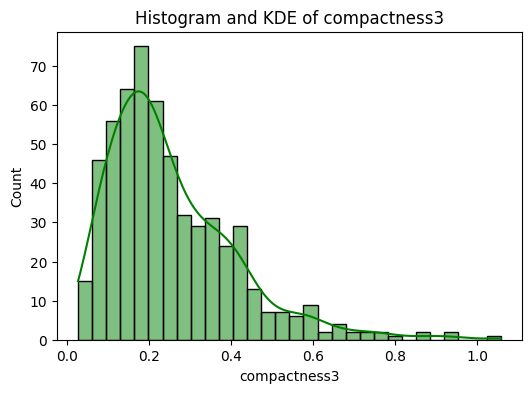

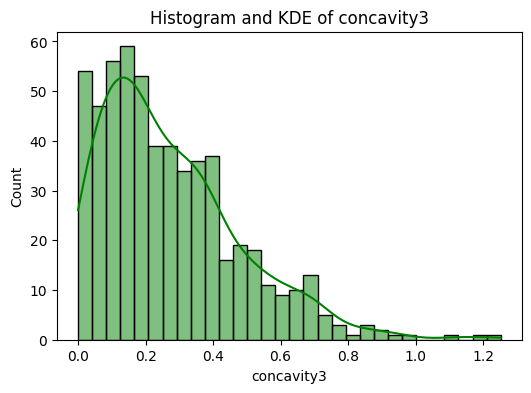

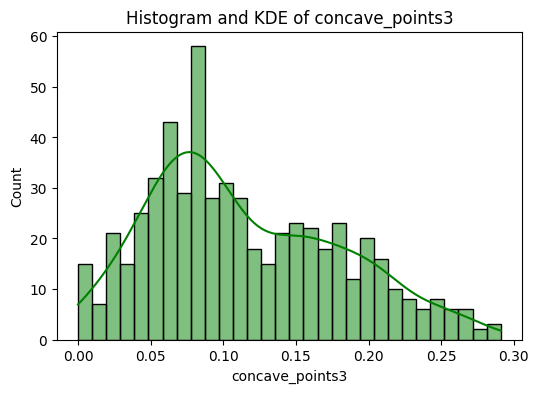

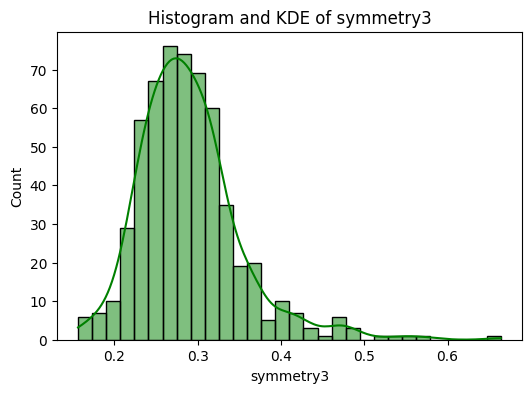

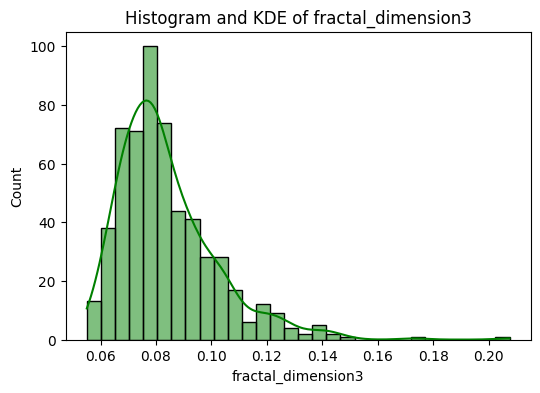

In [ ]:
for col in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col],kde=True,bins=30,color='green')
    plt.xlabel(col)
    plt.title(f'Histogram and KDE of {col}')
    plt.show()

Les histogrammes accompagn√©s des courbes KDE permettent de visualiser la distribution des donn√©es pour chaque variable.

On observe que certaines variables comme radius1, area1, concavity1 sont asym√©triques, ce qui sugg√®re une distribution non gaussienne. Cela peut influencer certains mod√®les sensibles √† la normalit√©.
Ces graphiques sont utiles pour rep√©rer :
les valeurs extr√™mes (outliers)
les variables bimodales.
les variables √† forte asym√©trie.

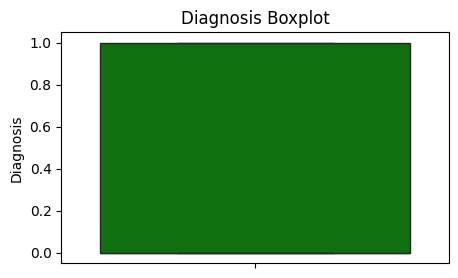

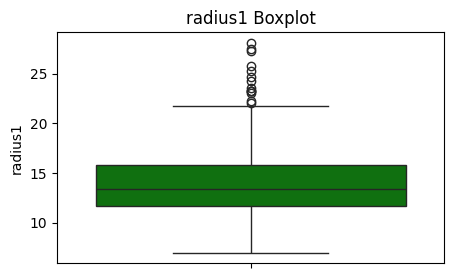

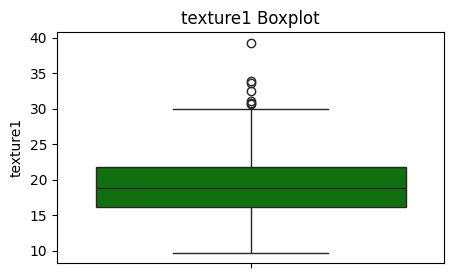

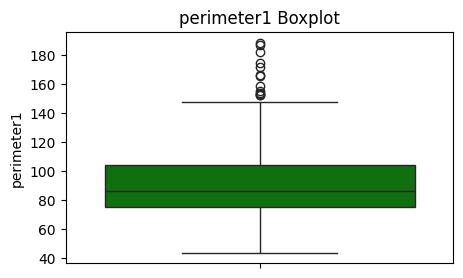

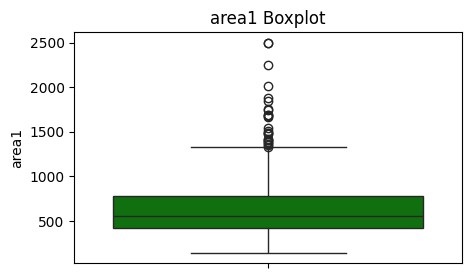

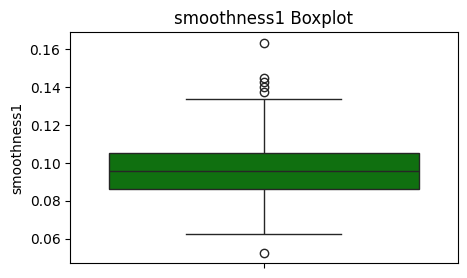

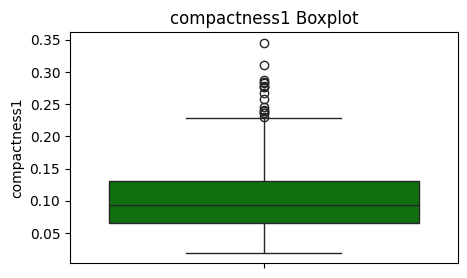

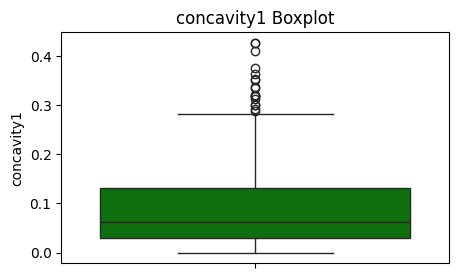

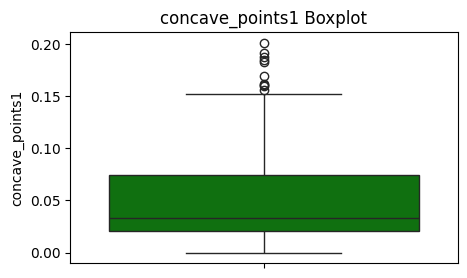

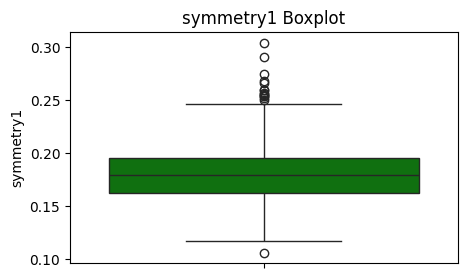

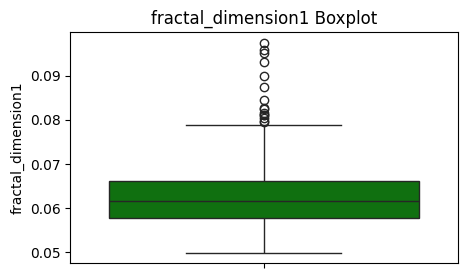

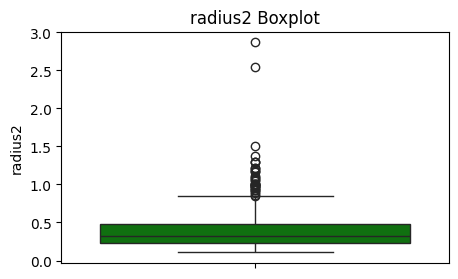

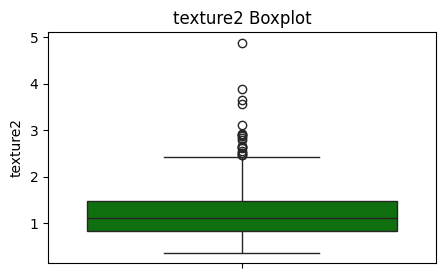

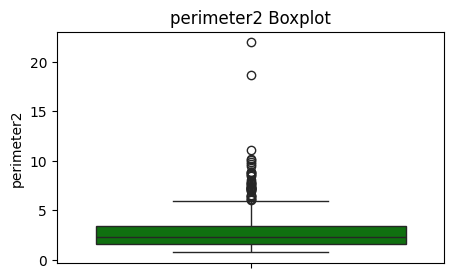

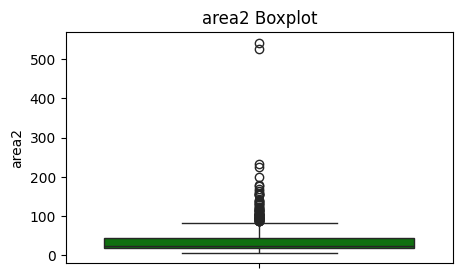

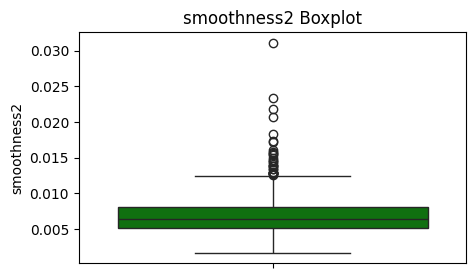

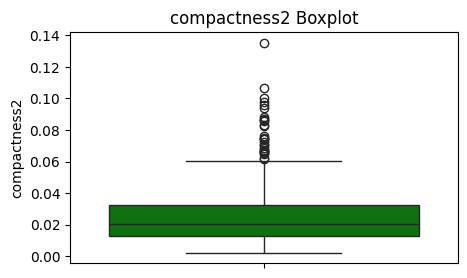

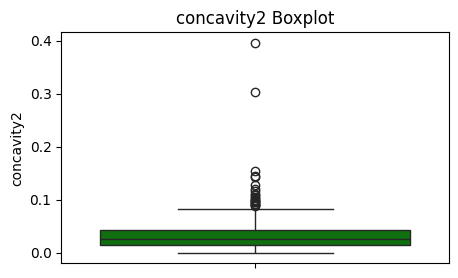

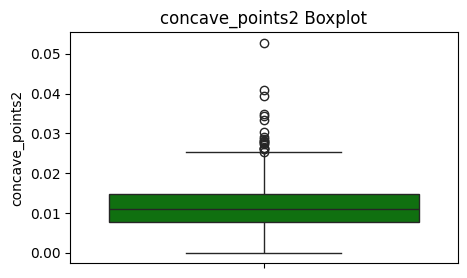

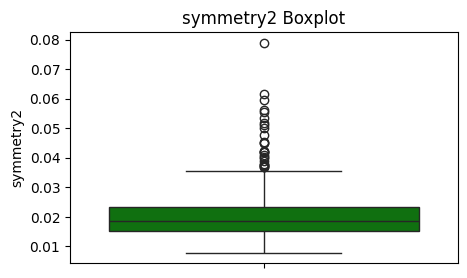

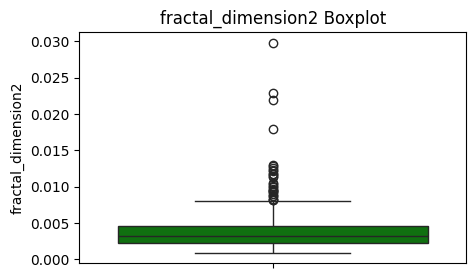

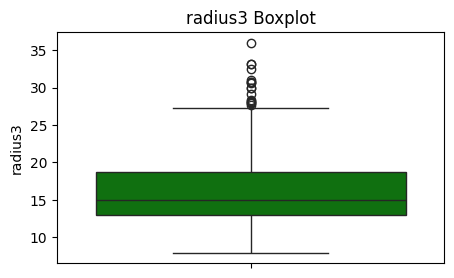

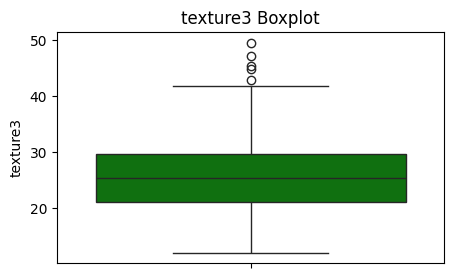

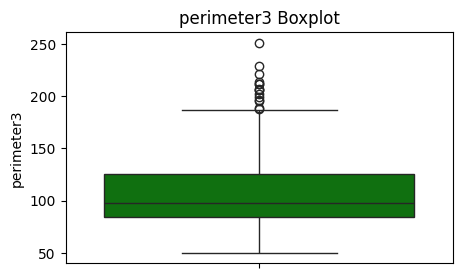

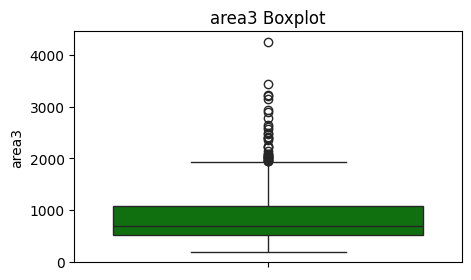

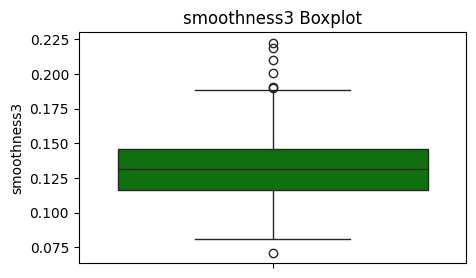

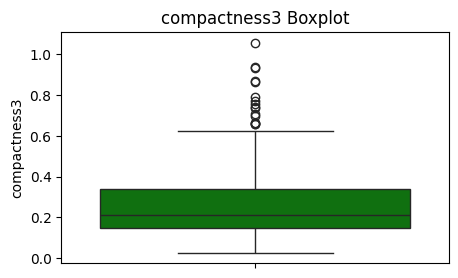

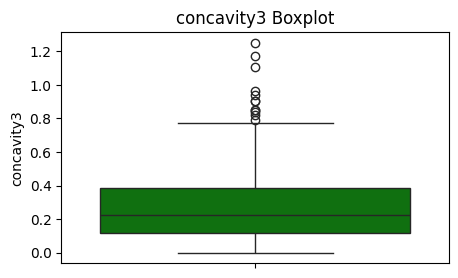

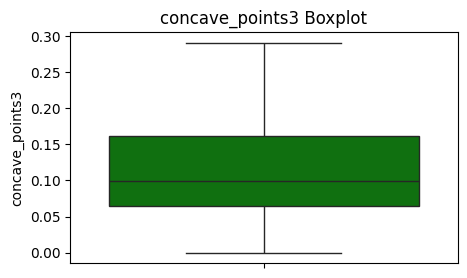

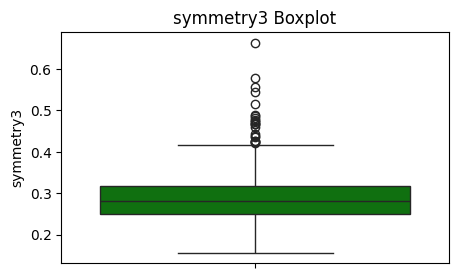

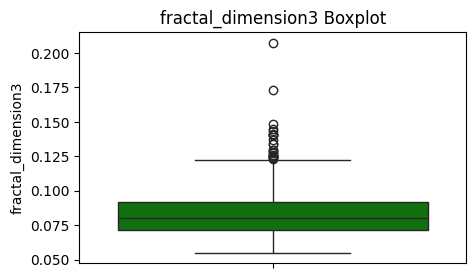

In [ ]:
for col in df.columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(df[col], color='green')
    plt.title(f"{col} Boxplot")
    plt.show()

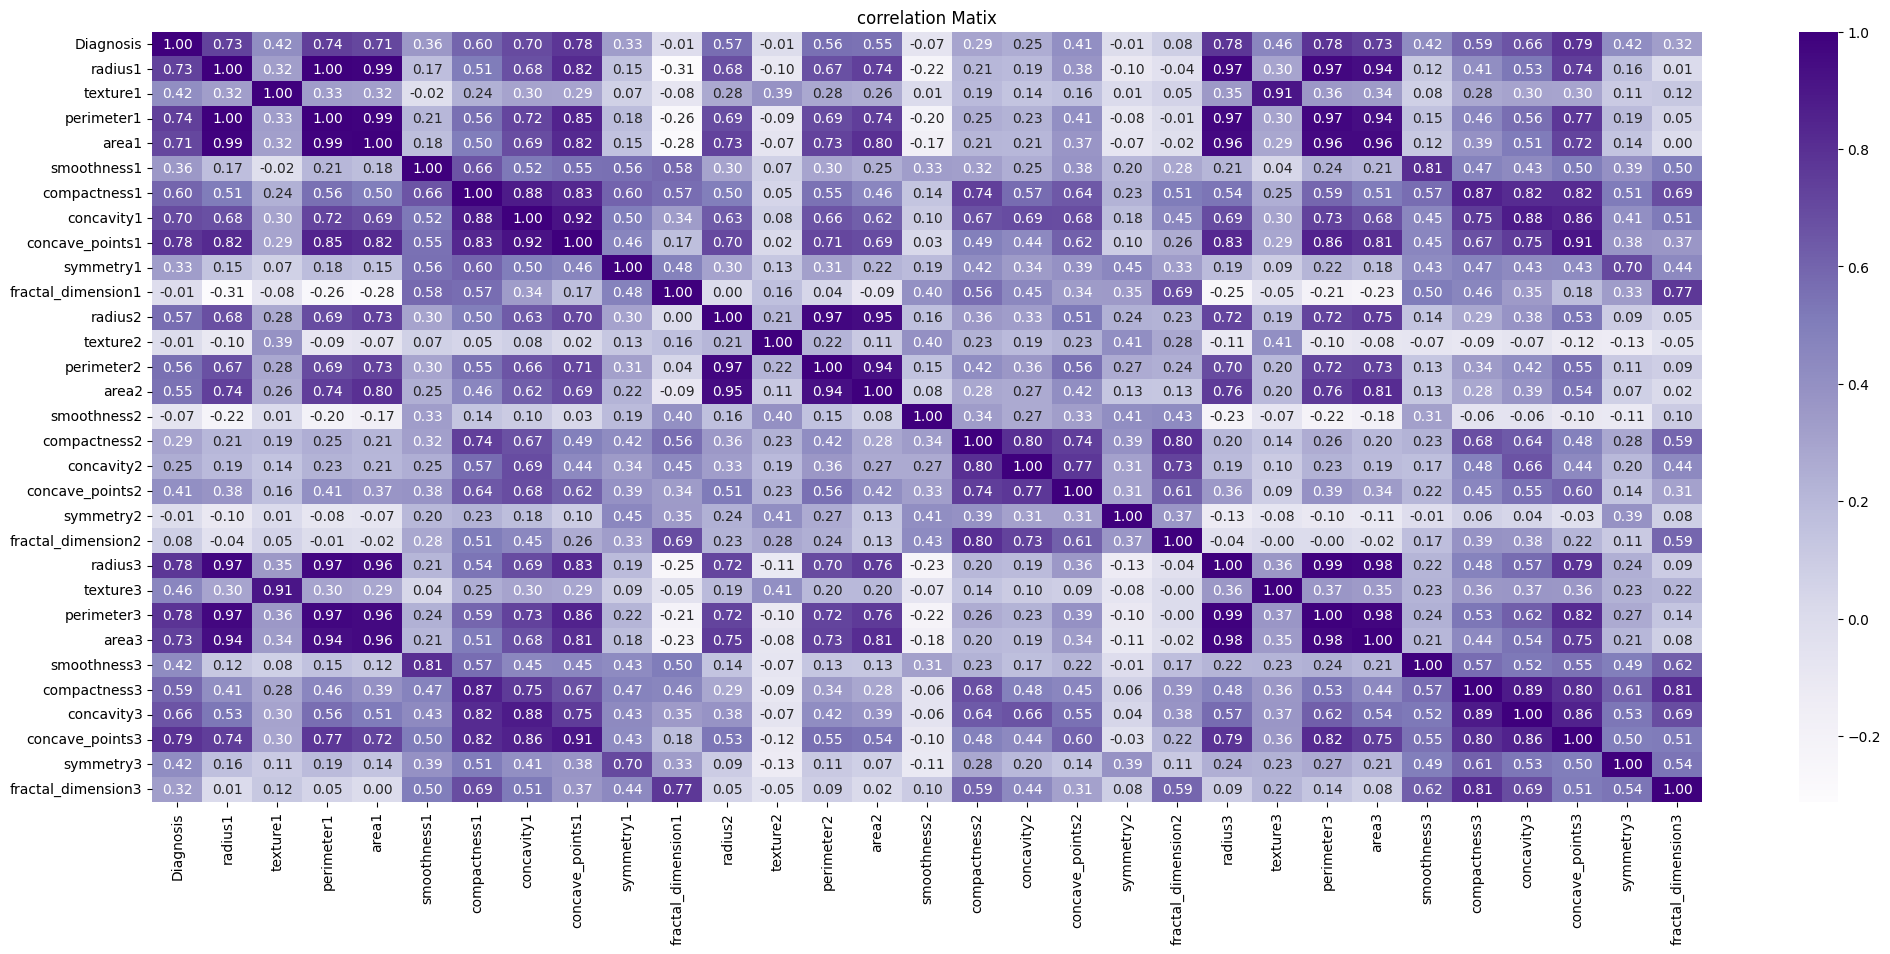

In [ ]:
plt.figure(figsize=(25, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True,cmap='Purples', fmt=".2f")
plt.title("correlation Matix")
plt.show()

# Interpr√©tation
La matrice de corr√©lation met en √©vidence les relations lin√©aires entre les diff√©rentes caract√©ristiques du jeu de donn√©es.
On observe plusieurs corr√©lations tr√®s fortes ( > 0.90) entre des variables similaires :
radius1, perimeter1, area1 : corr√©lation > 0.99
concavity1 et concave_points1 : 0.93
radius3, perimeter3, area3 : tr√®s fortes √©galement

Ces fortes corr√©lations indiquent que certaines variables pourraient √™tre redondantes et qu‚Äôon pourrait envisager de r√©duire la dimensionnalit√© (via PCA) pour am√©liorer l'efficacit√© des mod√®les.

La variable Diagnosis est particuli√®rement corr√©l√©e positivement avec :

concavity1, concave_points1, radius1, area1, etc.
Cela montre que certaines formes de noyaux cellulaires sont typiquement associ√©es aux tumeurs malignes.



Sur cette partie on se concentre plus sur les donn√©es de la variable cible diagnostis :

*  la statistique descriptive Calcule la moyenne et l‚Äô√©cart-type de chaque variable s√©par√©ment;elle permet de voir les variables plus √©lev√©es pour la tumeur maligne.
*   le botplox Compare la distribution de certaines variables pour les deux types de tumeurs.
*   Avec le PCA, on visualises si les tumeurs b√©nignes et malignes forment des groupes distincts.
*   La matrice de correlation d√©tectes les variables redondantes (tr√®s corr√©l√©es).







Cette analyse  a permis d‚Äôidentifier des variables morphologiques fortement discriminantes entre les tumeurs b√©nignes et malignes.

=== Statistiques descriptives ===
             radius1             texture1            perimeter1             \
                mean       std       mean       std        mean        std   
Diagnosis                                                                    
0          12.146524  1.780512  17.914762  3.995125   78.075406  11.807438   
1          17.462830  3.203971  21.604906  3.779470  115.365377  21.854653   

                area1             smoothness1            ... compactness3  \
                 mean         std        mean       std  ...         mean   
Diagnosis                                                ...                
0          462.790196  134.287118    0.092478  0.013446  ...     0.182673   
1          978.376415  367.937978    0.102898  0.012608  ...     0.374824   

                    concavity3           concave_points3           symmetry3  \
                std       mean       std            mean       std      mean   
Diagnosis                    

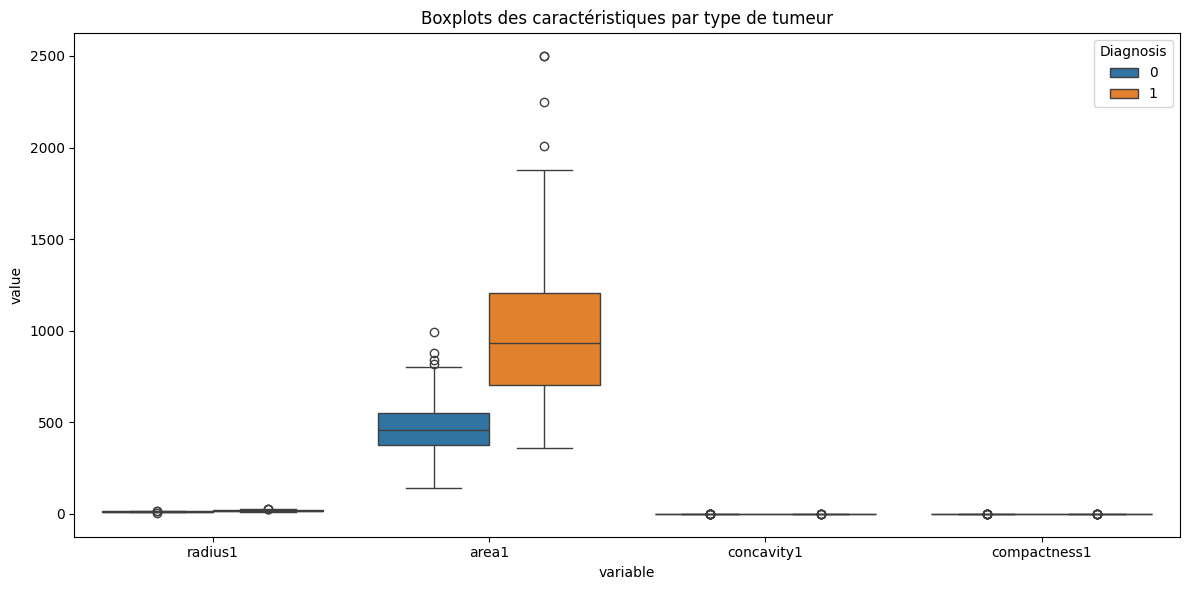

In [ ]:
# Statistiques descriptives par classe
desc_stats = df.groupby('Diagnosis').agg(['mean', 'std'])
print("=== Statistiques descriptives ===")
print(desc_stats)

# Normalisation
features = df.drop(columns=['Diagnosis'])
target = df['Diagnosis']
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Boxplots
plt.figure(figsize=(12, 6))
selected_features = ['radius1', 'area1', 'concavity1', 'compactness1']
# Corrected the column name from 'diagnosis' to 'Diagnosis'
df_melted = pd.melt(df, id_vars="Diagnosis", value_vars=selected_features)
sns.boxplot(x="variable", y="value", hue="Diagnosis", data=df_melted)
plt.title("Boxplots des caract√©ristiques par type de tumeur")
plt.tight_layout()
plt.show()



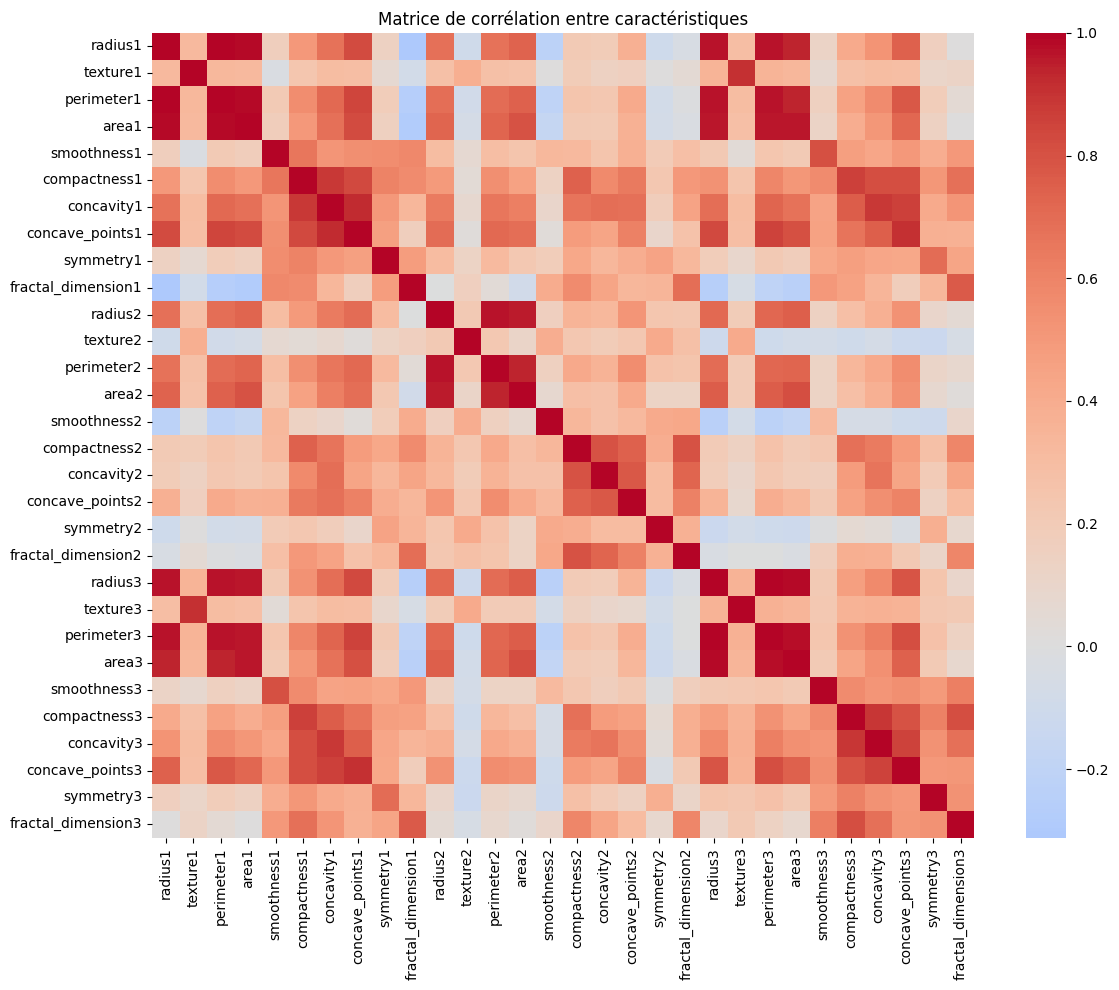

In [ ]:
# Matrice de corr√©lation
plt.figure(figsize=(12, 10))
corr = df.drop(columns=['Diagnosis']).corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Matrice de corr√©lation entre caract√©ristiques")
plt.tight_layout()
plt.show()



le PCA consiste √† projeter des donn√©es de dimensions sup√©rieures (par exemple 3 dimensions) sur un espace plus petit (par exemple 2 dimensions)

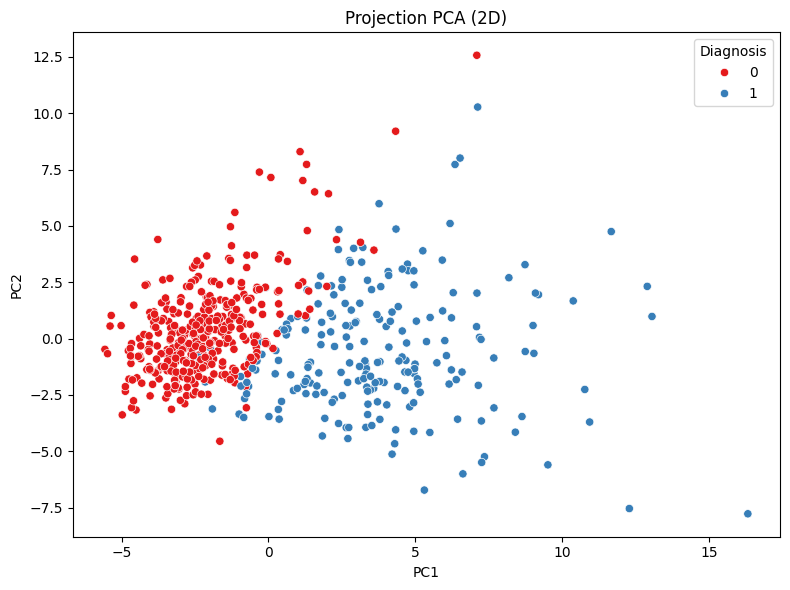

In [ ]:
#  PCA : Analyse en Composantes Principales afin de reduire le nombre de variables dans le jeu de donn√©es
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
df_pca['Diagnosis'] = target.values

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Diagnosis', palette='Set1')
plt.title("Projection PCA (2D)")
plt.tight_layout()
plt.show()



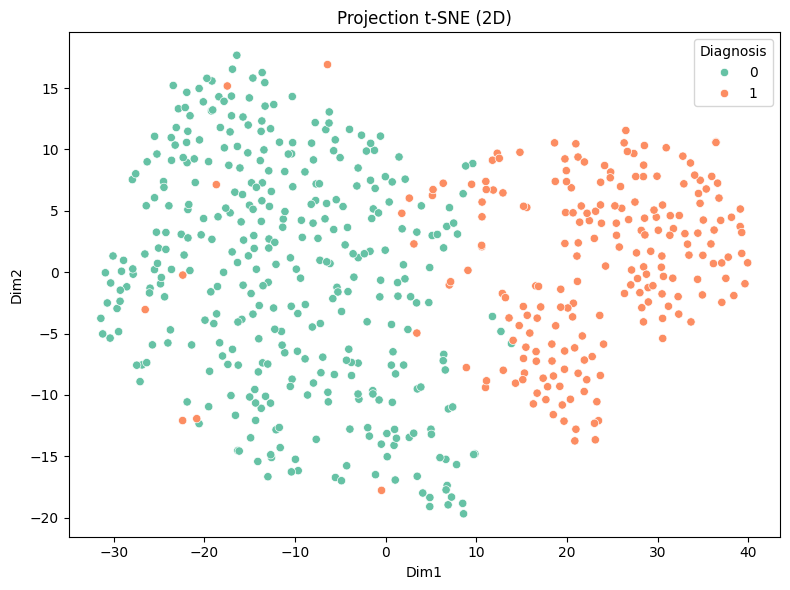

In [ ]:
#  t-SNE: Incrustation Stochastique t-distribu√©e des Voisins
#afin de visualiser les groupes de donn√©es
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(features_scaled)
df_tsne = pd.DataFrame(tsne_result, columns=['Dim1', 'Dim2'])
df_tsne['Diagnosis'] = target.values

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_tsne, x='Dim1', y='Dim2', hue='Diagnosis', palette='Set2')
plt.title("Projection t-SNE (2D)")
plt.tight_layout()
plt.show()

On applique ici l'algorithme de clustering K-Means pour voir si les donn√©es morphologiques des noyaux cellulaires se regroupent naturellement en 2 cat√©gories, et si ces cat√©gories correspondent aux diagnostics r√©els (b√©nigne/maligne). Cela fait partie aussi de l'analyse exploratoire des donn√©es.


 Correspondance entre Clusters KMeans et Diagnostics r√©els 
Cluster      0    1
Diagnosis          
0          339   18
1           36  176


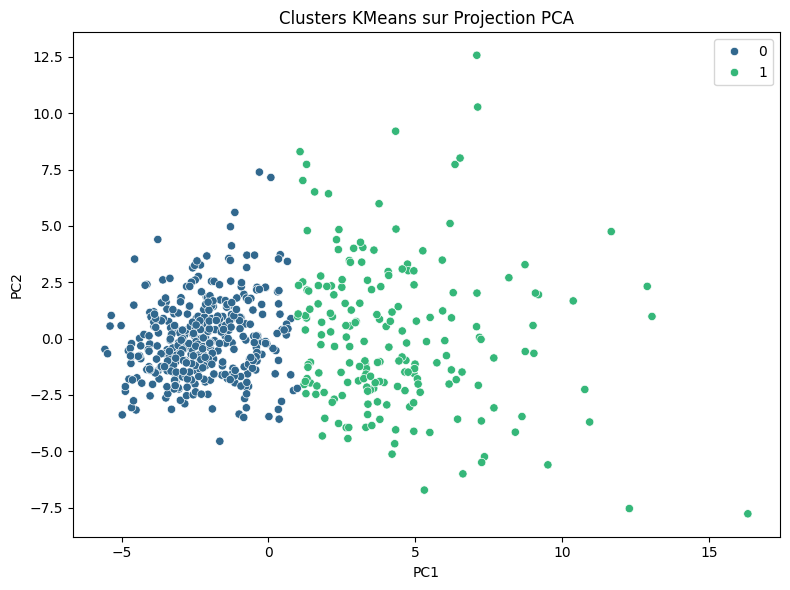

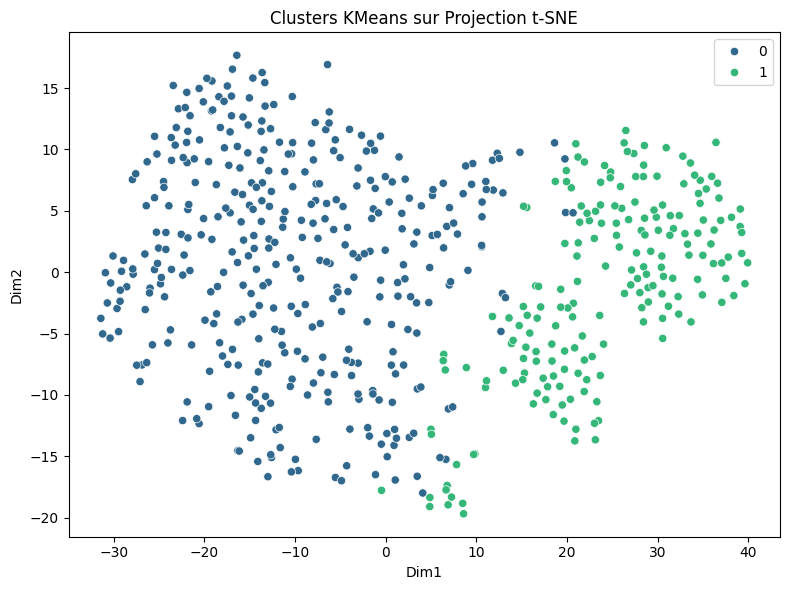

In [ ]:

from sklearn.cluster import KMeans

# D√©finir le nombre de clusters attendus (ici, 2 : b√©nigne et maligne)
n_clusters = 2

# Cr√©e et entra√Æne le mod√®le KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # n_init pour √©viter les avertissements
cluster_labels = kmeans.fit_predict(features_scaled)

# Ajoute les labels de cluster au DataFrame original pour l'analyse
df_clustered = df.copy()
df_clustered['Cluster'] = cluster_labels

# Analyse comment les clusters correspondent aux vrais diagnostics
print("\n Correspondance entre Clusters KMeans et Diagnostics r√©els ")
print(pd.crosstab(df_clustered['Diagnosis'], df_clustered['Cluster']))

# Visualise les clusters sur la projection PCA ou t-SNE
# Sur la projection PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=cluster_labels, palette='viridis')
plt.title("Clusters KMeans sur Projection PCA")
plt.tight_layout()
plt.show()

# Sur la projection t-SNE
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_tsne, x='Dim1', y='Dim2', hue=cluster_labels, palette='viridis')
plt.title("Clusters KMeans sur Projection t-SNE")
plt.tight_layout()
plt.show()

  On peut voir que les points d'une couleur de cluster forment un groupe distinct, et les points de l'autre couleur de cluster forment un autre groupe distinct.
  La visualisation du graphes nous confirme que la structure spatiale des donn√©es (telle que captur√©e par PCA et t-SNE) correspond bien aux clusters trouv√©s par K-Means.Cela renforce bien l'id√©e que la structure  des donn√©es est align√©e avec la classification clinique. Cela montre que m√™me sans dire au mod√®le o√π se trouvent les limites entre b√©nigne et maligne, il parvient √† trouver des regroupements qui y correspondent.

On observe le PCA qui  montre une tendance claire √† la s√©paration entre les deux classes, malgr√© quelques chevauchement entre les donn√©es; La projection t-SNE quant √† elle montre deux groupes distincts correspondant aux tumeurs b√©nignes et malignes. Ces visualisations confirment que les caract√©ristiques morphologiques extraites des noyaux cellulaires permettent de diff√©rencier les tumeurs b√©nignes des tumeurs malignes.Ce qui justifie l‚Äôutilisation de mod√®les de classification supervis√©e pour automatiser le diagnostic. ces resultats sont bien en accord avec le resultat d'interpretation du clustering algorithme de k-means.

# 3.pr√©paration des donn√©es et normalisation pour les mod√®les

In [ ]:
# S√©parer les donn√©es en X (variables explicatives) et y (la classe √† pr√©dire)
X = df.drop(columns=["Diagnosis"])  # toutes les colonnes sauf la colonne diagnostique
y = df["Diagnosis"]                 # la cible (0 = b√©nigne, 1 = maligne)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42,shuffle=True
)


# 4.Entrainement du mod√®le de regression logistique
C'est le mod√®le de base pour la classification binaire.Il mod√©lise la probabilit√© d'appartenir √† la classe positive en utilisant une fonction sigmo√Øde.Il nous
servira de base pour comparer les performances des mod√®les plus complexes.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Cr√©ation du mod√®le
model = LogisticRegression(max_iter=1000)

# Entra√Ænement sur les donn√©es d'apprentissage
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
# Pr√©dictions sur X_test
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Rapport de classification (pr√©cision, rappel, F1-score)
print("=== Rapport de classification ===")
print(classification_report(y_test, y_pred))

# Matrice de confusion
print("=== Matrice de confusion ===")
print(confusion_matrix(y_test, y_pred))

# Score AUC ROC
y_prob = model.predict_proba(X_test)[:, 1]
print("=== AUC ROC ===")
print(roc_auc_score(y_test, y_prob))


=== Rapport de classification ===
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

=== Matrice de confusion ===
[[106   2]
 [  1  62]]
=== AUC ROC ===
0.9980893592004703


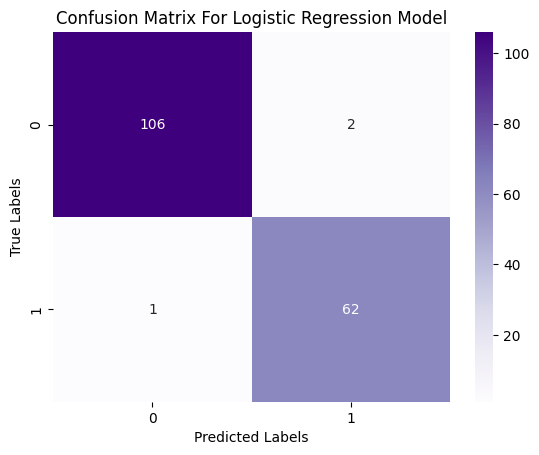

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       107
           1       0.98      0.97      0.98        64

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [ ]:
cm_lo = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_lo, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For Logistic Regression Model')
plt.show()
print(classification_report(y_pred, y_test))

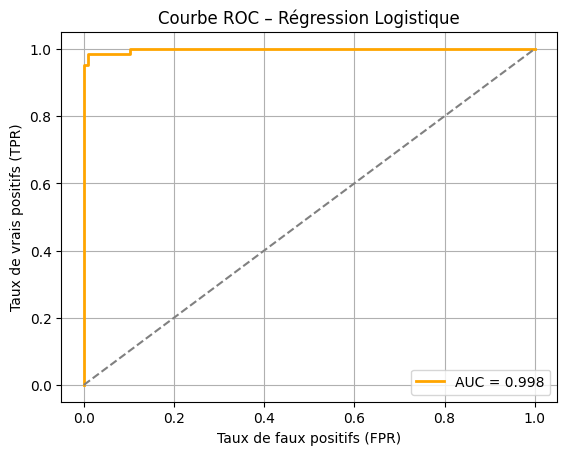

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Pr√©dire les probabilit√©s
y_proba_log = model.predict_proba(X_test)[:, 1]

# Calculer les points ROC
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
roc_auc_log = auc(fpr_log, tpr_log)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr_log, tpr_log, color='orange', lw=2, label=f'AUC = {roc_auc_log:.3f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC ‚Äì R√©gression Logistique')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Interpr√©tation :
106 vraies b√©nignes bien class√©es
2 b√©nignes class√©es √† tort comme malignes
1 maligne class√©e √† tort comme b√©nigne
62 vraies malignes bien class√©es
Seulement 3 erreurs sur 171 exemples.
Score AUC(Receiver Operating Characteristic) entre 0 et 1 qui indique la capacit√© du mod√®le √† bien s√©parer les classes.
Le mod√®le atteint une pr√©cision globale de 98 %, avec un F1-score √©lev√© pour les deux classes, et une aire sous la courbe ROC de 0.998, indiquant une excellente capacit√© de s√©paration entre les tumeurs b√©nignes et malignes.

# 5.Comparaison de plusieurs autres mod√®les:
On entra√Æne plusieurs algorithmes de machine learning et comparons leurs performances afin  d'identifier le meilleur mod√®le pour le diagnostic du cancer du sein.
L'abre de decision,Random Forest;Naive Bayes, R√©seaux de Neurones, Gradient Boosting, Machines √† Vecteurs de Support

# Arbre de decision
 C'est un mod√®le de machine learning supervis√© utilis√© pour la classification (comme ici : tumeur b√©nigne ou maligne).Ce mod√®le permet de  prendre des d√©cisions s√©quentielles bas√©es sur les valeurs des caract√©ristiques.
 Ici:L‚Äôarbre de d√©cision a correctement identifi√© 60 tumeurs b√©nignes et 101 tumeurs malignes
Il a fait 10 erreurs :
*   3 faux positifs : des tumeurs b√©nignes class√©es √† tort comme malignes
  
*   7 faux n√©gatifs  : des tumeurs malignes class√©es comme b√©nignes (les plus graves)
Ce mod√®le a une bonne pr√©cision (94%) pour
 nous permettre de diff√©rencier une tumeur b√©nigne / maligne
Il est interpr√©table (on peut visualiser les r√®gles) Mais il est un peu moins performant que la r√©gression logistique









In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Cr√©ation du mod√®le
dt_model = DecisionTreeClassifier(random_state=42)

# Entra√Ænement sur les donn√©es d'apprentissage
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
#  Pr√©dictions
Y_pred_dt = dt_model.predict(X_test)

#  Accuracy
print("Accuracy :", accuracy_score(y_test, Y_pred_dt))


Accuracy : 0.9415204678362573


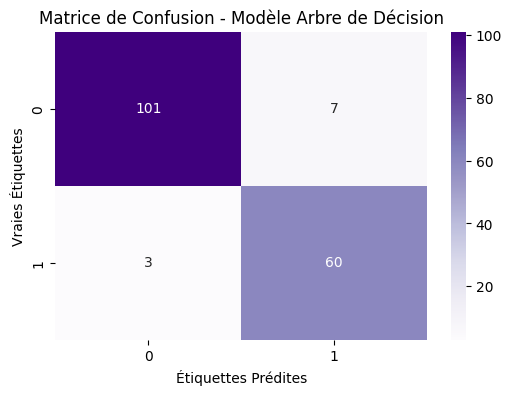

In [ ]:
#  Matrice de confusion
cm_dt = confusion_matrix(y_test, Y_pred_dt)

#  Affichage
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Purples')
plt.xlabel('√âtiquettes Pr√©dites')
plt.ylabel('Vraies √âtiquettes')
plt.title('Matrice de Confusion - Mod√®le Arbre de D√©cision')
plt.show()

In [ ]:
# Score AUC ROC
y_prob = model.predict_proba(X_test)[:, 1]
print("=== AUC ROC ===")
print(roc_auc_score(y_test, Y_pred_dt))

=== AUC ROC ===
0.9437830687830688


In [ ]:
print(classification_report(Y_pred_dt, y_test))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       104
           1       0.95      0.90      0.92        67

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



# Random Forest
 C'est une m√©thode d'ensemble qui combine plusieurs arbres de d√©cision. Elle r√©duit le risque de surapprentissage par rapport √† un seul arbre.

---


Apr√®s un entra√Ænement sur les donn√©es, le mod√®le a atteint une pr√©cision de 97,66‚ÄØ% (accuracy).
La matrice de confusion obtenue montre que la majorit√© des tumeurs ont √©t√© correctement class√©es, avec :
un tr√®s faible taux de faux positifs (tumeurs b√©nignes class√©es √† tort comme malignes),et surtout un tr√®s faible taux de faux n√©gatifs, ce qui est essentiel dans un contexte m√©dical o√π une tumeur maligne non d√©tect√©e peut avoir des cons√©quences graves.
La robustesse du mod√®le provient de sa capacit√© √† combiner plusieurs arbres de d√©cision, ce qui r√©duit le risque de surapprentissage et am√©liore la stabilit√© des pr√©dictions.
En comparaison avec les autres mod√®les test√©s :
le Random Forest offre une performance √©quivalente voire l√©g√®rement inf√©rieure √† la r√©gression logistique (AUC ‚âà 0.97 vs 0.998),
mais reste nettement sup√©rieur √† l‚Äôarbre de d√©cision seul.


Accuracy : 0.9707602339181286


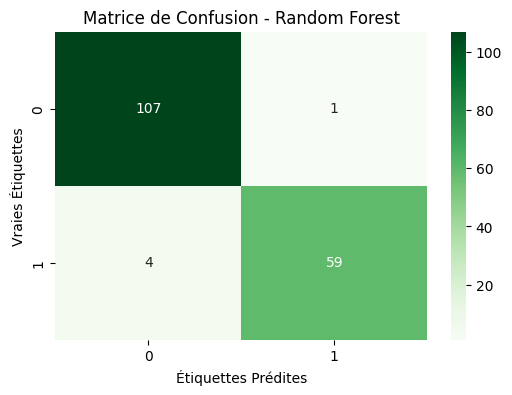

In [ ]:


# mod√®le Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entra√Ænement
rf_model.fit(X_train, y_train)

# Pr√©dictions
y_pred_rf = rf_model.predict(X_test)

# Accuracy
print("Accuracy :", accuracy_score(y_test, y_pred_rf))

# Matrice de confusion
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.xlabel('√âtiquettes Pr√©dites')
plt.ylabel('Vraies √âtiquettes')
plt.title('Matrice de Confusion - Random Forest')
plt.show()


In [ ]:
# Score AUC ROC
y_prob = model.predict_proba(X_test)[:, 1]
print("=== AUC ROC ===")
print(roc_auc_score(y_test, y_pred_rf))

=== AUC ROC ===
0.9636243386243386


##  Naives bayes
Le mod√®le Naive Bayes a √©t√© appliqu√© √† notre  jeu de donn√©es  afin de pr√©dire le type de tumeur (b√©nigne ou maligne). Le mod√®le atteint une pr√©cision globale sensiblement √©gale √† 94‚ÄØ%.

L‚Äôanalyse de la matrice de confusion r√©v√®le une bonne capacit√© √† identifier correctement les tumeurs malignes, bien que quelques erreurs subsistent, notamment des faux n√©gatifs. Compar√© aux autres mod√®les test√©s (r√©gression logistique, arbre de d√©cision, for√™t al√©atoire), le Naive Bayes offre des performances correctes tout en √©tant tr√®s rapide et l√©ger √† ex√©cuter.


Accuracy : 0.935672514619883
Rapport de classification :
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       108
           1       0.92      0.90      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



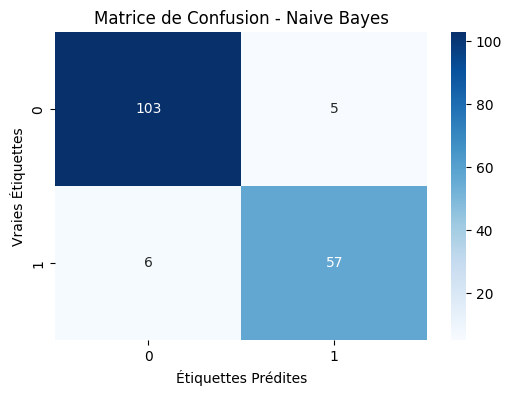

In [ ]:
# Cr√©ation du mod√®le
nb_model = GaussianNB()

# Entra√Ænement
nb_model.fit(X_train, y_train)

# Pr√©diction
y_pred_nb = nb_model.predict(X_test)

# √âvaluation
print("Accuracy :", accuracy_score(y_test, y_pred_nb))
print("Rapport de classification :\n", classification_report(y_test, y_pred_nb))

# Matrice de confusion
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('√âtiquettes Pr√©dites')
plt.ylabel('Vraies √âtiquettes')
plt.title('Matrice de Confusion - Naive Bayes')
plt.show()


In [ ]:
# Score AUC ROC
y_prob = model.predict_proba(X_test)[:, 1]
print("=== AUC ROC ===")
print(roc_auc_score(y_test, y_pred_nb))

=== AUC ROC ===
0.9292328042328042


# R√©seaux de Neurones

Un r√©seau de neurones est un mod√®le √† plusieurs niveaux inspir√© du cerveau humain.
R√©sultats obtenus :
üîπ Courbes d‚Äôapprentissage :
Bonne convergence en moins de 10 √©poques
Pas de surapprentissage visible : validation ‚âà entra√Ænement
Validation stable autour de 0.97.
Pour la matrice de confusion :Seulement 4 erreurs sur 171 cas :
3 faux positifs
1 faux n√©gatif.

Nombre de caract√©ristiques en entr√©e : 30
=== Structure du R√©seau de Neurones ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ dense (Dense)                   ‚îÇ (None, 128)            ‚îÇ         3,968 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)               ‚îÇ (None, 128)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                 ‚îÇ (None, 64)             ‚îÇ         8,256 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_1 (Dropout)             ‚îÇ (None, 64)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_2 (Dense)                 ‚îÇ (None, 1)              ‚îÇ            65 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 12,289 (48.00 KB)

 Trainable params: 12,289 (48.00 KB)

 Non-trainable params: 0 (0.00 B)


 Entra√Ænement du R√©seau de Neurones 
Epoch 1/100
10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 66ms/step - accuracy: 0.6443 - loss: 0.6418 - val_accuracy: 0.9750 - val_loss: 0.3530
Epoch 2/100
10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step - accuracy: 0.8851 - loss: 0.3681 - val_accuracy: 0.9750 - val_loss: 0.2217
Epoch 3/100
10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step - accuracy: 0.9587 - loss: 0.2158 - val_accuracy: 0.9750 - val_loss: 0.1580
Epoch 4/100
10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 10ms/step - accuracy: 0.9230 - loss: 0.2162 - val_accuracy: 0.9750 - val_loss: 0.1268
Epoch 5/100
10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 15ms/step - accuracy: 0.9213 - loss: 0.2011 - val_accuracy: 0.9875 - val_loss: 0.1089
Epoch 6/100
10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step - accuracy: 0.9649 - loss: 0

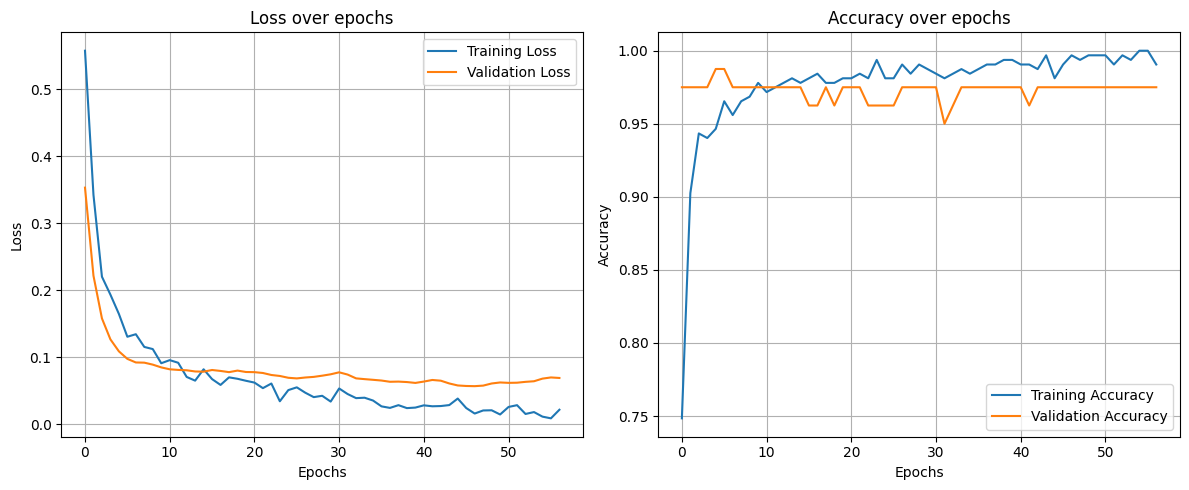


 √âvaluation sur l'ensemble de test 
Test Loss: 0.0710
Test Accuracy: 0.9766
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 17ms/step
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       108
           1       0.95      0.98      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



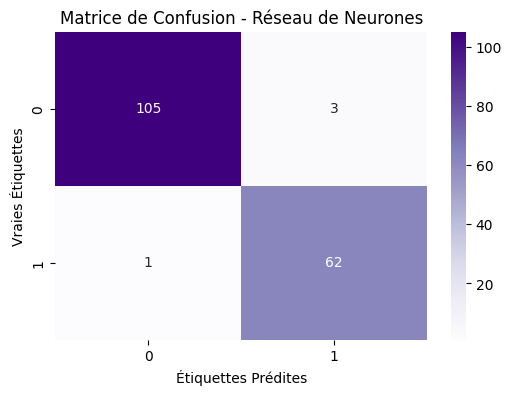

score AUC_ROC
0.9951499118165784


In [ ]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
input_shape = X_train.shape[1]
print(f"Nombre de caract√©ristiques en entr√©e : {input_shape}")

nn_model = Sequential()

nn_model.add(Dense(units=128, activation='relu', input_shape=(input_shape,)))

nn_model.add(Dropout(0.5))

nn_model.add(Dense(units=64, activation='relu'))
nn_model.add(Dropout(0.5))

nn_model.add(Dense(units=1, activation='sigmoid'))
print("=== Structure du R√©seau de Neurones ===")
nn_model.summary()
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               restore_best_weights=True)


print("\n Entra√Ænement du R√©seau de Neurones ")
history = nn_model.fit(X_train, y_train,
                       epochs=100,
                       batch_size=32,
                       validation_split=0.2,
                       callbacks=[early_stopping],
                       verbose=1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("\n √âvaluation sur l'ensemble de test ")
loss, accuracy = nn_model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


y_pred_proba_nn = nn_model.predict(X_test)
y_pred_nn = (y_pred_proba_nn > 0.5).astype(int)

print(classification_report(y_test, y_pred_nn))
cm_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Purples')
plt.xlabel('√âtiquettes Pr√©dites')
plt.ylabel('Vraies √âtiquettes')
plt.title('Matrice de Confusion - R√©seau de Neurones')
plt.show()

print("score AUC_ROC")
print(roc_auc_score(y_test, y_pred_proba_nn))


# Interpretation des resultats

Le mod√®le de r√©seau de neurones entra√Æn√© sur le jeu de donn√©es Breast Cancer Wisconsin a montr√© d‚Äôexcellentes performances pour la classification des tumeurs b√©nignes et malignes. Avec une pr√©cision de 97,66‚ÄØ% et une AUC ROC de 0.995, le mod√®le d√©montre une forte capacit√© de g√©n√©ralisation.

La courbe d‚Äôapprentissage montre une bonne stabilit√© sans surapprentissage. La matrice de confusion indique que tr√®s peu de tumeurs malignes ont √©t√© mal class√©es, ce qui est essentiel dans un cadre m√©dical.

Ainsi, le r√©seau de neurones constitue un mod√®le robuste, fiable et pertinent pour un syst√®me de diagnostic assist√© du cancer du sein, en compl√©ment du jugement m√©dical.

# Gradient boosting

=== Gradient Boosting ===
Accuracy : 0.9590643274853801
AUC ROC : 0.9951499118165784
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



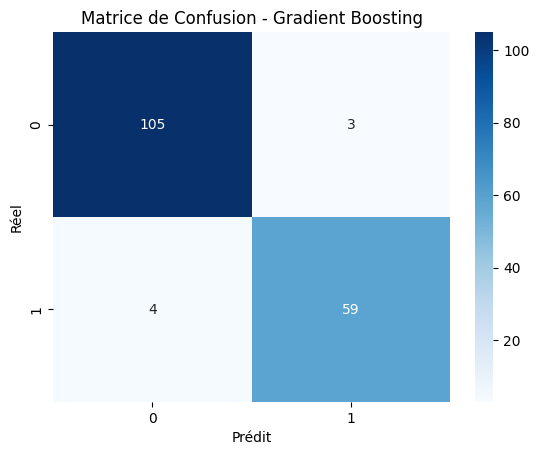

In [ ]:


# Cr√©ation du mod√®le Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)

# Entra√Ænement
gb_model.fit(X_train, y_train)

# Pr√©diction
y_pred_gb = gb_model.predict(X_test)
y_proba_gb = gb_model.predict_proba(X_test)[:, 1]

# √âvaluation
print(" Gradient Boosting ")
print("Accuracy :", accuracy_score(y_test, y_pred_gb))
print("AUC ROC :", roc_auc_score(y_test, y_proba_gb))
print(classification_report(y_test, y_pred_gb))

# Matrice de confusion
cm_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Pr√©dit")
plt.ylabel("R√©el")
plt.title("Matrice de Confusion - Gradient Boosting")
plt.show()


# Machines √† Vecteurs de Support (Support Vector Machines - SVM)


=== Support Vector Machine ===
Accuracy : 0.9707602339181286
AUC ROC : 0.9966196355085244
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



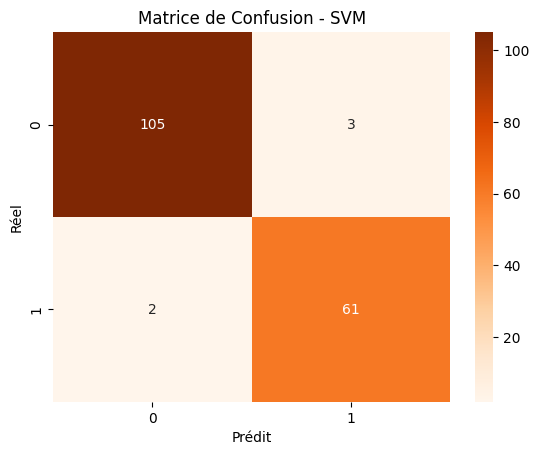

In [ ]:
from sklearn.svm import SVC

# Cr√©ation du mod√®le SVM avec calcul de probabilit√© pour ROC
svm_model = SVC(probability=True, random_state=42)

# Entra√Ænement
svm_model.fit(X_train, y_train)

# Pr√©diction
y_pred_svm = svm_model.predict(X_test)
y_proba_svm = svm_model.predict_proba(X_test)[:, 1]

# √âvaluation
print("\nSupport Vector Machine ")
print("Accuracy :", accuracy_score(y_test, y_pred_svm))
print("AUC ROC :", roc_auc_score(y_test, y_proba_svm))
print(classification_report(y_test, y_pred_svm))

# Matrice de confusion
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Pr√©dit")
plt.ylabel("R√©el")
plt.title("Matrice de Confusion - SVM")
plt.show()


# Interpr√©tation des mod√®le gradient boosting et svm
Les mod√®les Gradient Boosting et SVM ont √©t√© √©valu√©s  pour la d√©tection de tumeurs malignes. Le mod√®le SVM atteint une pr√©cision de 97.08‚ÄØ% avec un score AUC de 0.996, surpassant l√©g√®rement le Gradient Boosting (accuracy : 95.91‚ÄØ%, AUC : 0.995).

La matrice de confusion du SVM montre une tr√®s bonne capacit√© de g√©n√©ralisation, avec peu de faux positifs et un taux de faux n√©gatifs relativement faible.



# Comparaison des mod√®les utilis√©s
La** r√©gression logistique** est √©tonnamment le meilleur mod√®le, avec un excellent compromis entre simplicit√© et performance.

Le r√©seau de neurones et le SVM sont tr√®s performants, avec des scores proches de 98‚ÄØ%, mais plus complexes √† expliquer.

Les mod√®les Random Forest et Gradient Boosting donnent aussi d‚Äôexcellents r√©sultats tout en offrant une bonne capacit√© d‚Äôinterpr√©tation (importance des variables).

Les mod√®les Naive Bayes et Arbre de D√©cision seul sont moins performants, mais utiles comme baseline ou pour une interpr√©tation simple.

# Conclusion G√©n√©rale
Ce projet visait √† analyser les caract√©ristiques morphologiques des noyaux cellulaires issues de biopsies mammaires pour d√©velopper un syst√®me de diagnostic automatis√© du cancer du sein.

En utilisant le jeu de donn√©es Breast Cancer Wisconsin (Diagnostic), plusieurs mod√®les de classification supervis√©e ont √©t√© compar√©s. Les r√©sultats montrent que la r√©gression logistique offre des performances remarquables (accuracy = 98‚ÄØ%, AUC = 0.998), surpassant m√™me des mod√®les plus complexes tels que les r√©seaux de neurones ou le SVM.

Ces performances indiquent une tr√®s bonne capacit√© de s√©paration entre tumeurs b√©nignes et malignes, avec un taux d‚Äôerreurs tr√®s faible, ce qui est crucial en contexte m√©dical.

En conclusion, ce travail met en √©vidence l‚Äôint√©r√™t de l‚Äôanalyse morphologique assist√©e par intelligence artificielle pour am√©liorer la d√©tection pr√©coce du cancer du sein. Le mod√®le final pourrait √™tre int√©gr√© dans un outil de soutien au diagnostic m√©dical, tout en conservant une interpr√©tabilit√© suffisante pour les professionnels de sant√©.

Le mod√®le final retenu est la r√©gression logistique, pour sa robustesse, son interpr√©tabilit√© et ses excellentes performances (accuracy de 98‚ÄØ% et AUC ROC de 0.998).

Pour valider la fiabilit√© du mod√®le, plusieurs m√©thodes peuvent √™tre mises en place :

la validation crois√©e pour garantir la stabilit√© sur le jeu actuel,

l‚Äôapplication √† un autre jeu de donn√©es m√©dical pour tester la g√©n√©ralisation,

et l‚Äôanalyse des erreurs pour d√©tecter d‚Äô√©ventuels biais ou cas limites.

Ces √©tapes assurent que le mod√®le ne se contente pas d'apprendre le dataset, mais qu‚Äôil est capable de g√©n√©raliser √† de nouveaux patients, ce qui est essentiel pour une application en diagnostic m√©dical.

## Comment utiliser mon mod√®le maching learning pour predire sur des donn√©es r√©elles si un sein est cancereux ou pas:
on entre en donn√©es des caract√©ristique du sein sous la m√™me forme que nos donn√©es entrain√©e. Une fois entra√Æn√©, le mod√®le peut √™tre utilis√© pour pr√©dire automatiquement si une nouvelle observation (issue d‚Äôune biopsie) correspond √† une tumeur b√©nigne ou maligne.
En fournissant les caract√©ristiques morphologiques d‚Äôun sein sain, le mod√®le est capable de reconna√Ætre l‚Äôabsence de cancer, car il a appris √† diff√©rencier les profils typiques des cellules canc√©reuses des normales;et il utilises les lignes de codes suivantes pour predire la classe: if probabilit√© > 0.5 ‚Üí class√© comme cancer (1)
else ‚Üí b√©nin (0)

